# A7 - Regressions

This notebook contains the linear regressions of all the variables of interest with both the death rates and the infection mortality rates. For all combinations, a regression line is plotted along with a 95% confidence interval area.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
all_metrics = pd.read_csv("all_metrics.csv")

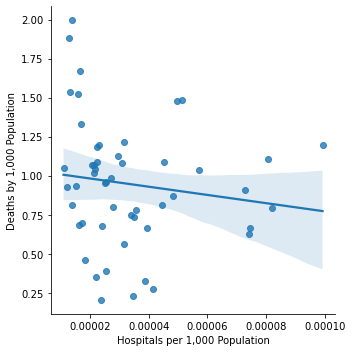

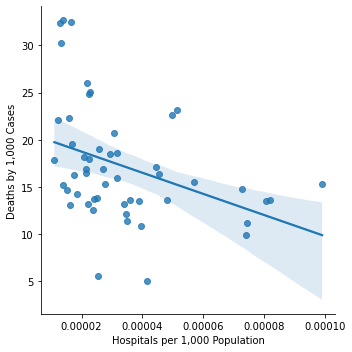

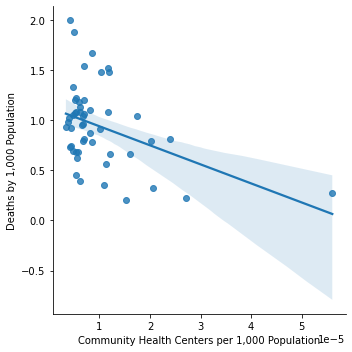

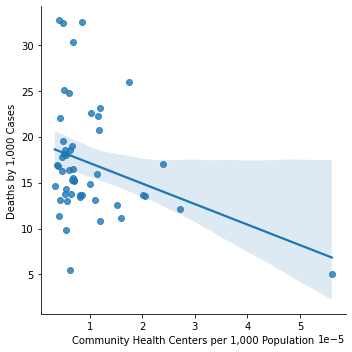

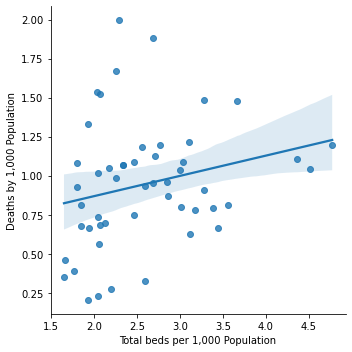

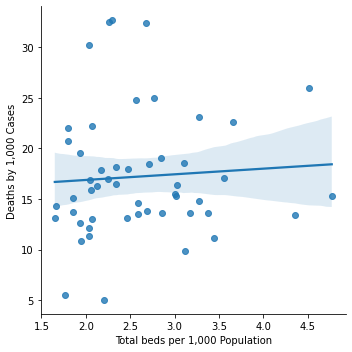

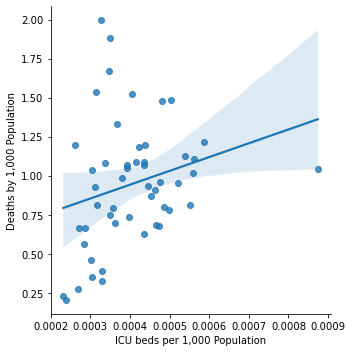

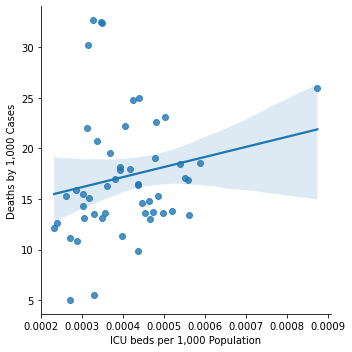

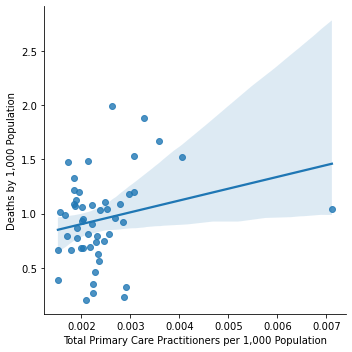

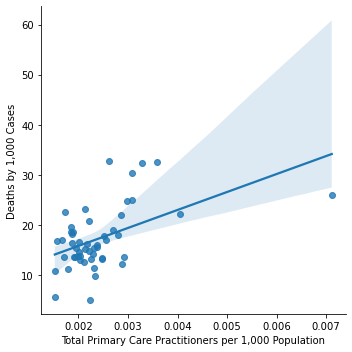

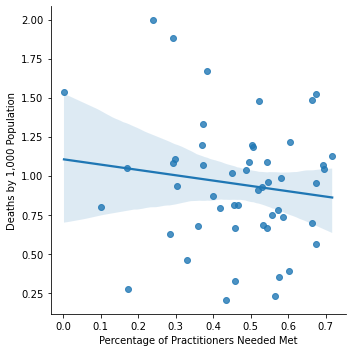

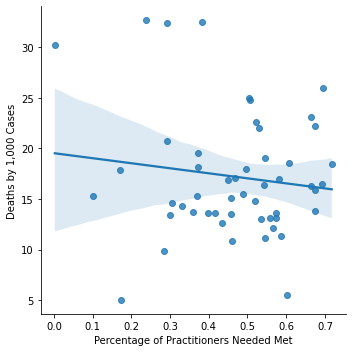

In [3]:
health_infrastructure_indicators = [
    'Hospitals per 1,000 Population',
    'Community Health Centers per 1,000 Population',
    'Total beds per 1,000 Population',
    'ICU beds per 1,000 Population',
    'Total Primary Care Practitioners per 1,000 Population',
    'Percentage of Practitioners Needed Met']

for indicator in health_infrastructure_indicators:
    sns.lmplot(x=indicator, y='Deaths by 1,000 Population', data=all_metrics, fit_reg=True, ci=95, n_boot=1000)
    sns.lmplot(x=indicator, y='Deaths by 1,000 Cases', data=all_metrics, fit_reg=True, ci=95, n_boot=1000)

## Outliers

The plots for 'Total Primary Care Practitioners per 1,000 Population' show some obvious outliers.

In [4]:
all_metrics[['State', 'Total Primary Care Practitioners per 1,000 Population']].sort_values(by='Total Primary Care Practitioners per 1,000 Population', ascending=False).head(5)

,State,"Total Primary Care Practitioners per 1,000 Population"
8,District of Columbia,0.007113
39,Rhode Island,0.004052
21,Massachusetts,0.003583
32,New York,0.003284
6,Connecticut,0.003084


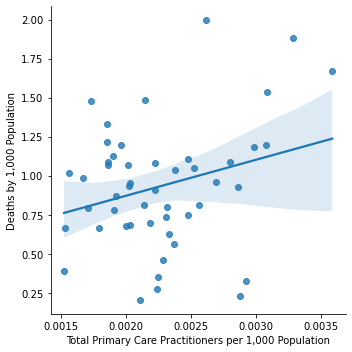

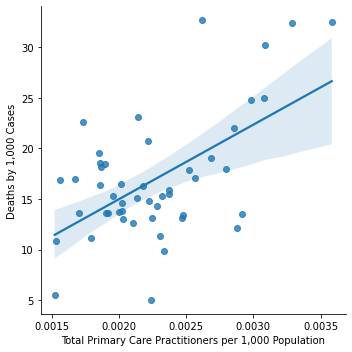

In [5]:
filtered = all_metrics[all_metrics['State'] != 'District of Columbia']
filtered = filtered[filtered['State'] != 'Rhode Island']

sns.lmplot(x='Total Primary Care Practitioners per 1,000 Population', y='Deaths by 1,000 Population', data=filtered, fit_reg=True, ci=95, n_boot=1000)
sns.lmplot(x='Total Primary Care Practitioners per 1,000 Population', y='Deaths by 1,000 Cases', data=filtered, fit_reg=True, ci=95, n_boot=1000)

Even removing the outliers, the relationship is still positive.

In [8]:
all_metrics[['State', 'ICU beds per 1,000 Population']].sort_values(by='ICU beds per 1,000 Population', ascending=False).head(5)

,State,"ICU beds per 1,000 Population"
8,District of Columbia,0.000874
0,Alabama,0.000587
34,North Dakota,0.000561
28,Nevada,0.000558
48,West Virginia,0.000552


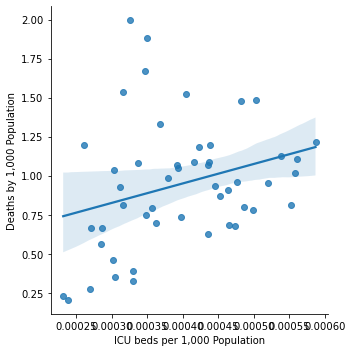

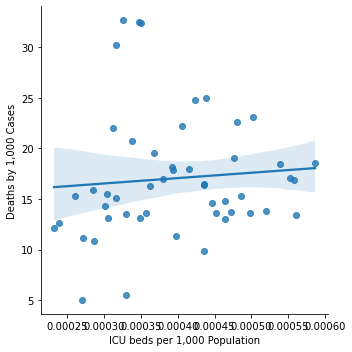

In [9]:
filtered = all_metrics[all_metrics['State'] != 'District of Columbia']

sns.lmplot(x='ICU beds per 1,000 Population', y='Deaths by 1,000 Population', data=filtered, fit_reg=True, ci=95, n_boot=1000)
sns.lmplot(x='ICU beds per 1,000 Population', y='Deaths by 1,000 Cases', data=filtered, fit_reg=True, ci=95, n_boot=1000)